# Time Series Analysis Project

**Group No. 9**

**Aim :** Some say climate change is the biggest threat of our age while others say it’s a myth based on dodgy science. We are turning some of the data over to you so you can form your own view.

**Dataset :** Global land temperature by state

**Perform :**

    1. Data Preproceesing 
    2. Select data for Analysis
    3. Apply resample techniques
    4. Perform EDA
    5. Perfrom decomposition
    6. Demonstrate Moving average
    7. Examine Stationarity
    8. Auto Regression
    9. Find p,d,q values using Auto ARIMA
    10. Prediction using ARIMA
    


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/home/user/Downloads/GlobalLandTemperaturesByState.csv',parse_dates=['dt'],index_col='dt')
df.head()

AverageTemperature  AverageTemperatureUncertainty State Country
dt                                                                         
1855-05-01              25.544                          1.171  Acre  Brazil
1855-06-01              24.228                          1.103  Acre  Brazil
1855-07-01              24.371                          1.044  Acre  Brazil
1855-08-01              25.427                          1.073  Acre  Brazil
1855-09-01              25.675                          1.014  Acre  Brazil

## Preprocessing and Data cleaning

In [3]:
df.shape

(645675, 4)

In [4]:
df.describe()

AverageTemperature  AverageTemperatureUncertainty
count       620027.000000                  620027.000000
mean             8.993111                       1.287647
std             13.772150                       1.360392
min            -45.389000                       0.036000
25%             -0.693000                       0.316000
50%             11.199000                       0.656000
75%             19.899000                       1.850000
max             36.339000                      12.646000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 645675 entries, 1855-05-01 to 2013-09-01
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             620027 non-null  float64
 1   AverageTemperatureUncertainty  620027 non-null  float64
 2   State                          645675 non-null  object 
 3   Country                        645675 non-null  object 
dtypes: float64(2), object(2)
memory usage: 24.6+ MB


In [6]:
df.isna().sum()

AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [7]:
# sns.pairplot(data=df)

In [8]:
df['Country'].unique()

array(['Brazil', 'Russia', 'United States', 'Canada', 'India', 'China',
       'Australia'], dtype=object)

## Select data for analysis

**Create new data for only India** 

In [9]:
india=df[df['Country']=='India']
india.head()

AverageTemperature  AverageTemperatureUncertainty  \
dt                                                              
1796-01-01              26.534                          1.904   
1796-02-01              26.294                          1.122   
1796-03-01              26.180                          1.959   
1796-04-01              27.942                          1.281   
1796-05-01              28.651                          1.119   

                          State Country  
dt                                       
1796-01-01  Andaman And Nicobar   India  
1796-02-01  Andaman And Nicobar   India  
1796-03-01  Andaman And Nicobar   India  
1796-04-01  Andaman And Nicobar   India  
1796-05-01  Andaman And Nicobar   India

In [10]:
india.isna().sum()

AverageTemperature               5044
AverageTemperatureUncertainty    5044
State                               0
Country                             0
dtype: int64

In [11]:
india=india.dropna()
india.isna().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
dtype: int64

In [12]:
india.tail()

AverageTemperature  AverageTemperatureUncertainty        State  \
dt                                                                           
2013-04-01              28.707                          0.275  West Bengal   
2013-05-01              29.694                          0.270  West Bengal   
2013-06-01              29.628                          0.465  West Bengal   
2013-07-01              29.115                          0.359  West Bengal   
2013-08-01              28.686                          0.304  West Bengal   

           Country  
dt                  
2013-04-01   India  
2013-05-01   India  
2013-06-01   India  
2013-07-01   India  
2013-08-01   India

In [13]:
india.shape

(81620, 4)

<AxesSubplot:xlabel='dt'>

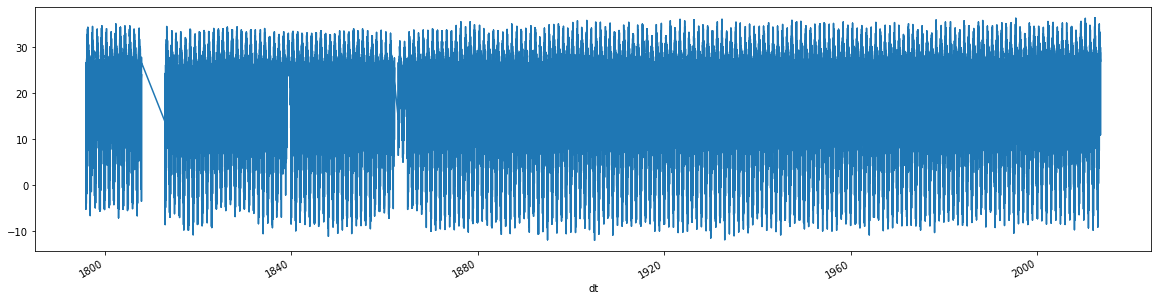

In [14]:
india['AverageTemperature'].plot(figsize=(20,5))

**we can see irregularity in data, so We will consider data of 1870 and onwards**

In [15]:
india=india.loc['1870-01-31':'2013-08-01',]

In [16]:
india.shape

(58574, 4)

<AxesSubplot:xlabel='dt'>

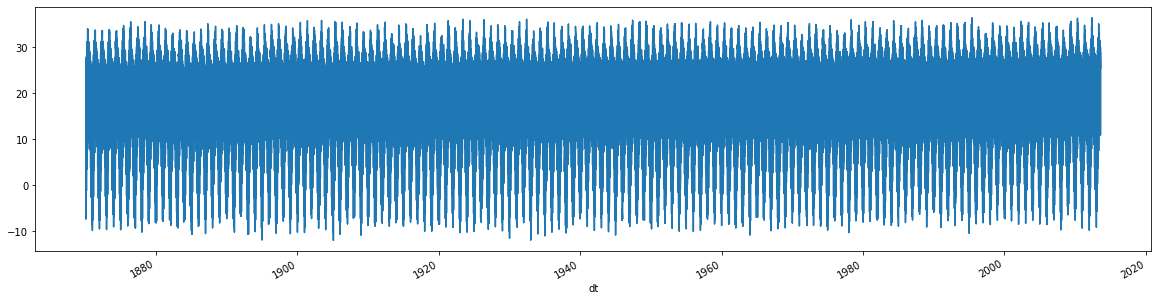

In [17]:
india['AverageTemperature'].plot(figsize=(20,5))

## Resampling for better visualization

array([<AxesSubplot:xlabel='dt'>, <AxesSubplot:xlabel='dt'>], dtype=object)

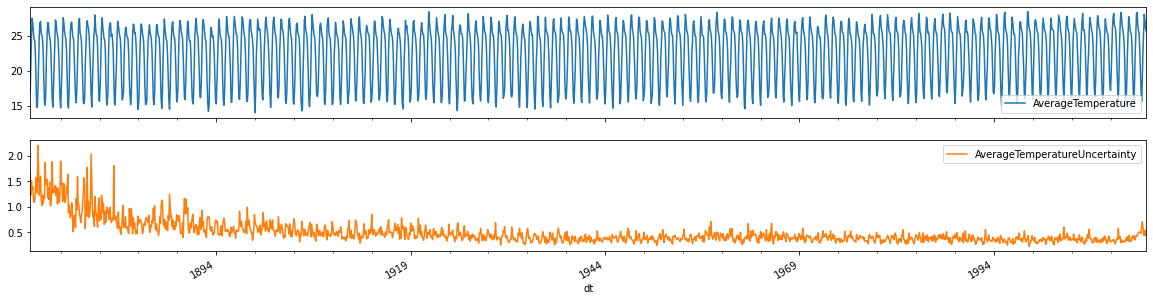

In [18]:
# get data according to month 
month=india.resample("M").mean()
month.plot(subplots=True,figsize=(20,5))


array([<AxesSubplot:xlabel='dt'>, <AxesSubplot:xlabel='dt'>], dtype=object)

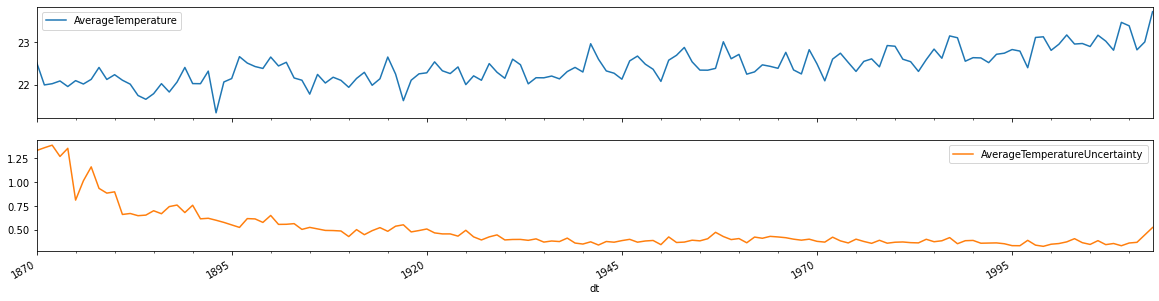

In [19]:
# get data according to year 
year=india.resample("Y").mean()

year.plot(subplots=True,figsize=(20,5))


##  EDA on Indian Average temperature data

In [20]:
#find max temperature reported
india_max=india[india.AverageTemperature==india.AverageTemperature.max()]
india_max

AverageTemperature  AverageTemperatureUncertainty  State Country
dt                                                                          
2012-06-01              36.339                          0.385  Delhi   India

In [21]:
india_new=india.loc["2011-01-01":"2012-12-30",["AverageTemperature","AverageTemperatureUncertainty"]]
india_new.head()

AverageTemperature  AverageTemperatureUncertainty
dt                                                           
2011-01-01              27.156                          0.823
2011-02-01              27.276                          0.344
2011-03-01              27.374                          0.238
2011-04-01              28.788                          0.581
2011-05-01              29.025                          0.484

array([<AxesSubplot:xlabel='dt'>, <AxesSubplot:xlabel='dt'>], dtype=object)

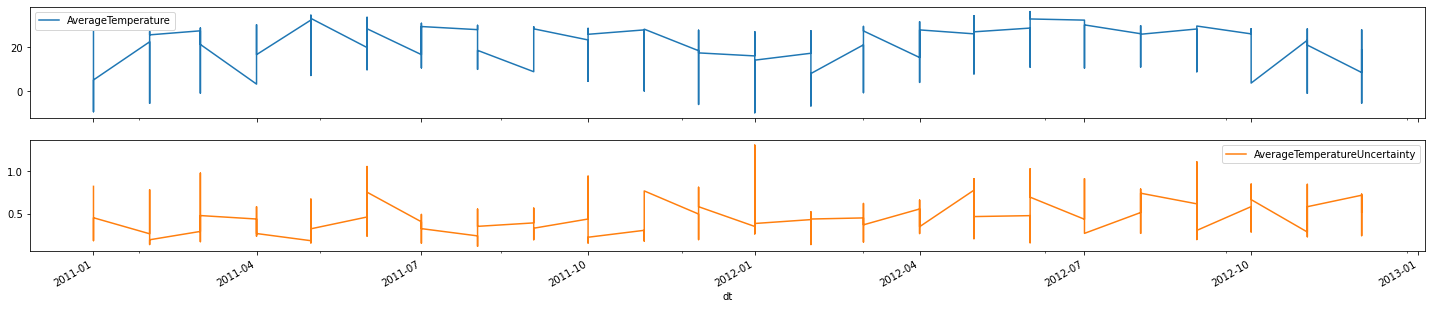

In [22]:
india_new.plot(subplots=True,figsize=(25,5))

array([<AxesSubplot:xlabel='dt'>, <AxesSubplot:xlabel='dt'>], dtype=object)

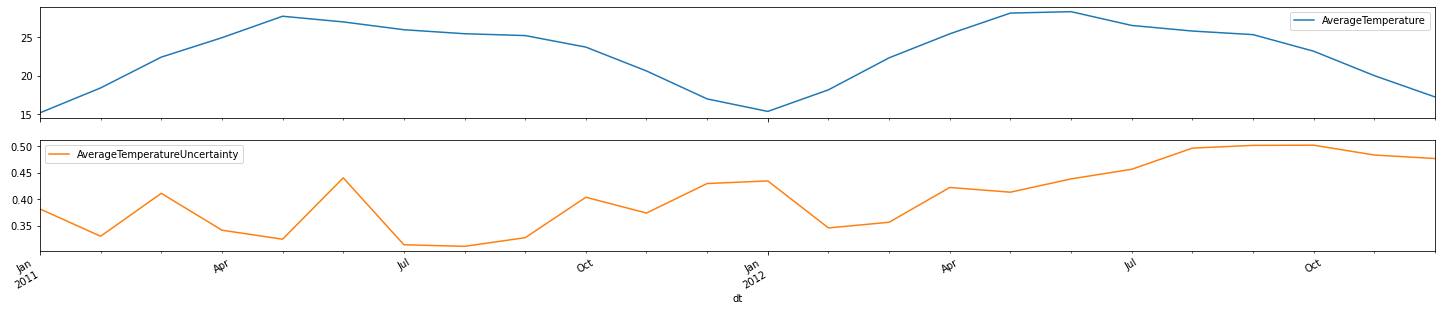

In [23]:
# get data according to month 

month_india=india_new.resample("M").mean()
month_india.plot(subplots=True,figsize=(25,5))


**Conclusion :** According to indian climate, high temperatures are recorded to be in april to july 

### Financial plots for better visualization

In [24]:
import plotly.graph_objects as gp
import plotly.express as px

In [25]:

fig = gp.Figure([gp.Scatter(x = year.index, 
                            y = year.AverageTemperature)])
fig.show()

In [26]:
fig = gp.Figure([gp.Scatter(x = month_india.index, 
                            y = month_india.AverageTemperature)])
fig.show()

In [27]:
px.bar(x=india_new.index,y=india_new.AverageTemperature)

In [28]:
px.bar(x=india_new.index,y=india_new.AverageTemperatureUncertainty)

### Decomposition

In [29]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



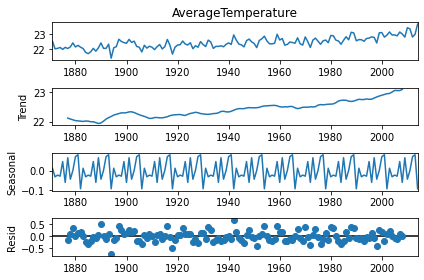

In [30]:
#getting components for yearly sampled data
# Trend   Seasonality   Irregularity    Cyclic

decomposition = sm.tsa.seasonal_decompose(x=year['AverageTemperature'], model = 'addictive',freq=12)
fig = decomposition.plot()

**Conclusion :-** We can see that the entire series is taken as the trend component and that there is same seasonality from start to end. We can also see that the residual plot between -5 to 5.

## Stationarity

Constant statistical properties -> mean, variance, std with does not change over time

**ADfuller test**

H0 : It is Non Stationary
    
H1 : It is Stationary

        
P value > 0.05 Fail to reject null hypothesis -> Non Stationary 


P value < 0.05 it is Stationary

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
output=adfuller(india['AverageTemperature'])
p_val=output[1]

In [33]:
if p_val > 0.05:
  print("Non Stationary")
else :
  print("Stationary")

Stationary


**Conclusion :** Since P value < 0.05..... it is Stationary

## Moving Average

Simple Moving Average

Comulative Moving Average

Exponential Moving Average

In [34]:
data=india.iloc[:,:-1]
data

AverageTemperature  AverageTemperatureUncertainty  \
dt                                                              
1870-02-01              24.804                          1.828   
1870-03-01              25.724                          2.502   
1870-04-01              27.336                          1.964   
1870-05-01              27.657                          2.017   
1870-06-01              27.144                          0.967   
...                        ...                            ...   
2013-04-01              28.707                          0.275   
2013-05-01              29.694                          0.270   
2013-06-01              29.628                          0.465   
2013-07-01              29.115                          0.359   
2013-08-01              28.686                          0.304   

                          State  
dt                               
1870-02-01  Andaman And Nicobar  
1870-03-01  Andaman And Nicobar  
1870-04-01  Andaman And Nicobar  
1870-05-01  Andaman And Nicobar  
1870-06-01  Andaman And Nicobar  
...                         ...  
2013-04-01          West Bengal  
2013-05-01          West Bengal  
2013-06-01          West Bengal  
2013-07-01          West Bengal  
2013-08-01          West Bengal  

[58574 rows x 3 columns]

In [35]:
#Simple moving average
data['SMA3']=india['AverageTemperature'].rolling(window=3).mean()
data['SMA4']=india['AverageTemperature'].rolling(window=4).mean()
data.head()

AverageTemperature  AverageTemperatureUncertainty  \
dt                                                              
1870-02-01              24.804                          1.828   
1870-03-01              25.724                          2.502   
1870-04-01              27.336                          1.964   
1870-05-01              27.657                          2.017   
1870-06-01              27.144                          0.967   

                          State       SMA3      SMA4  
dt                                                    
1870-02-01  Andaman And Nicobar        NaN       NaN  
1870-03-01  Andaman And Nicobar        NaN       NaN  
1870-04-01  Andaman And Nicobar  25.954667       NaN  
1870-05-01  Andaman And Nicobar  26.905667  26.38025  
1870-06-01  Andaman And Nicobar  27.379000  26.96525

In [36]:
data1=data.tail(100)

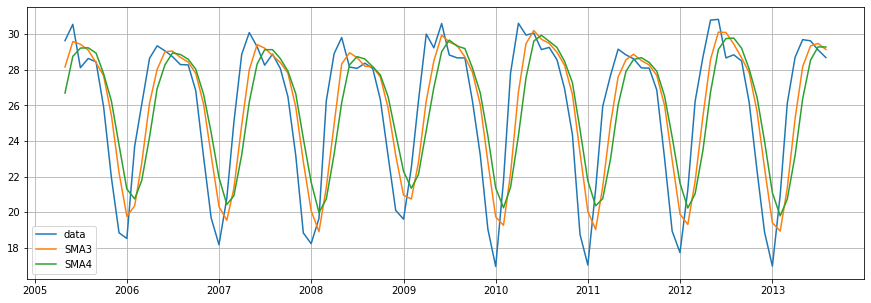

In [37]:
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(data1['AverageTemperature'],label='data')
plt.plot(data1['SMA3'],label='SMA3')
plt.plot(data1['SMA4'],label='SMA4')
plt.legend()

**Interpretation :-** When the temperature is moving upward or downward, so is the moving average line, albeit with a lag. After a temperature turning point, the temperature crosses the moving average line. At the V-shaped bottom on the preceding figure, for example, temperature are below the line until the gap (ellipse), and then temperature cross above the line.

In [38]:
#Comulative Moving Average
data['CMA_4'] = data["AverageTemperature"].expanding(min_periods = 4).mean()
data.head()

AverageTemperature  AverageTemperatureUncertainty  \
dt                                                              
1870-02-01              24.804                          1.828   
1870-03-01              25.724                          2.502   
1870-04-01              27.336                          1.964   
1870-05-01              27.657                          2.017   
1870-06-01              27.144                          0.967   

                          State       SMA3      SMA4     CMA_4  
dt                                                              
1870-02-01  Andaman And Nicobar        NaN       NaN       NaN  
1870-03-01  Andaman And Nicobar        NaN       NaN       NaN  
1870-04-01  Andaman And Nicobar  25.954667       NaN       NaN  
1870-05-01  Andaman And Nicobar  26.905667  26.38025  26.38025  
1870-06-01  Andaman And Nicobar  27.379000  26.96525  26.53300

In [39]:
data2=data.tail(100)

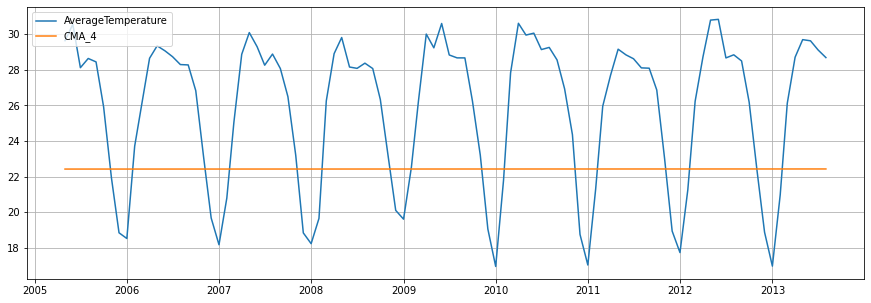

In [40]:
plt.figure(figsize = [15,5])
plt.grid(True)
plt.plot(data2['AverageTemperature'], label = 'AverageTemperature')
plt.plot(data2['CMA_4'], label = 'CMA_4')
plt.legend(loc = 2)
plt.show()

In [41]:
#Exponential Moving average
data['EMA'] = data["AverageTemperature"].ewm(span=40,adjust=False).mean()
data.head()

AverageTemperature  AverageTemperatureUncertainty  \
dt                                                              
1870-02-01              24.804                          1.828   
1870-03-01              25.724                          2.502   
1870-04-01              27.336                          1.964   
1870-05-01              27.657                          2.017   
1870-06-01              27.144                          0.967   

                          State       SMA3      SMA4     CMA_4        EMA  
dt                                                                         
1870-02-01  Andaman And Nicobar        NaN       NaN       NaN  24.804000  
1870-03-01  Andaman And Nicobar        NaN       NaN       NaN  24.848878  
1870-04-01  Andaman And Nicobar  25.954667       NaN       NaN  24.970201  
1870-05-01  Andaman And Nicobar  26.905667  26.38025  26.38025  25.101264  
1870-06-01  Andaman And Nicobar  27.379000  26.96525  26.53300  25.200910

In [42]:
data3=data.tail(100)


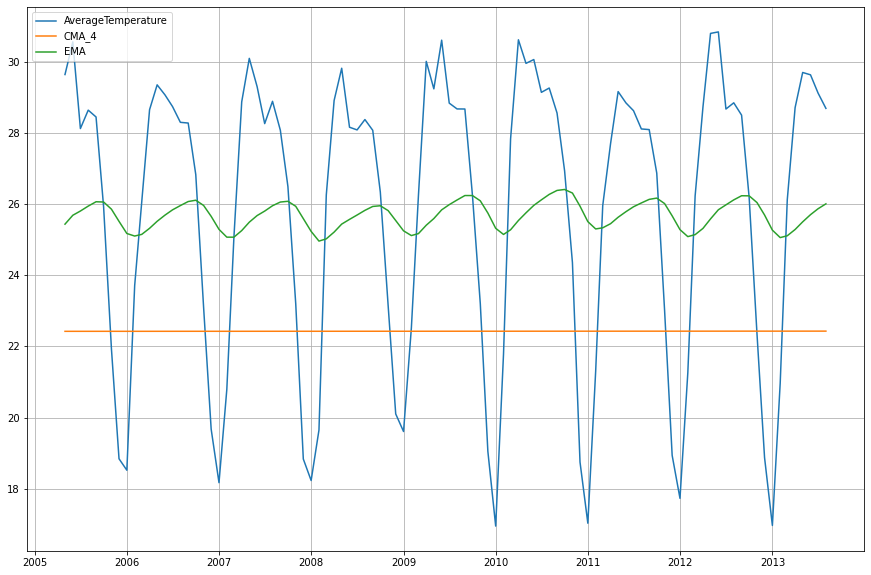

In [43]:
plt.figure(figsize = [15,10])
plt.grid(True)
plt.plot(data3['AverageTemperature'], label = 'AverageTemperature')
plt.plot(data3['CMA_4'], label = 'CMA_4')
plt.plot(data3['EMA'], label = 'EMA')
plt.legend(loc = 2)
plt.show()

## Auto Regression

In [44]:
df=india['AverageTemperature']

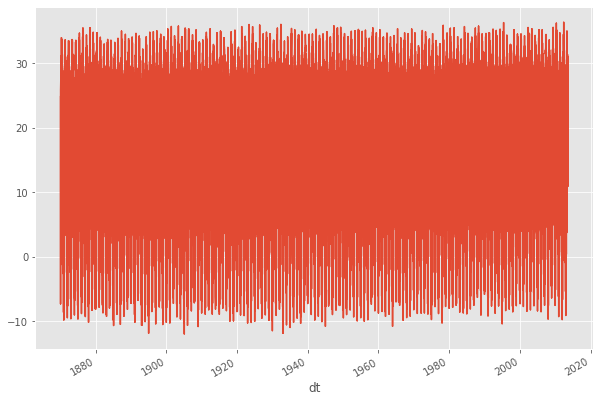

In [45]:

plt.rcParams['figure.figsize']=(10,7)
plt.style.use('ggplot')

df.plot()
plt.show()

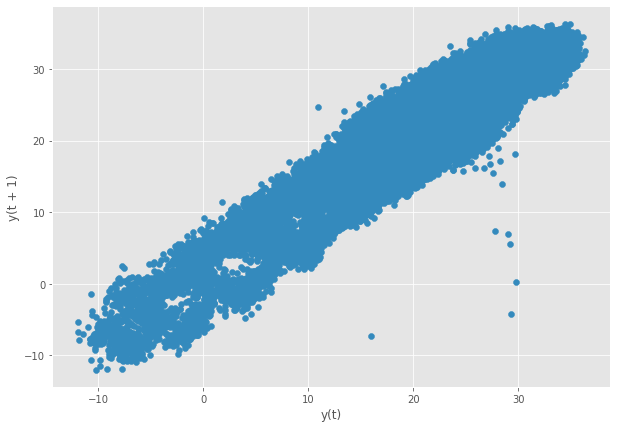

In [46]:
#lag plot

pd.plotting.lag_plot(df)
plt.show()

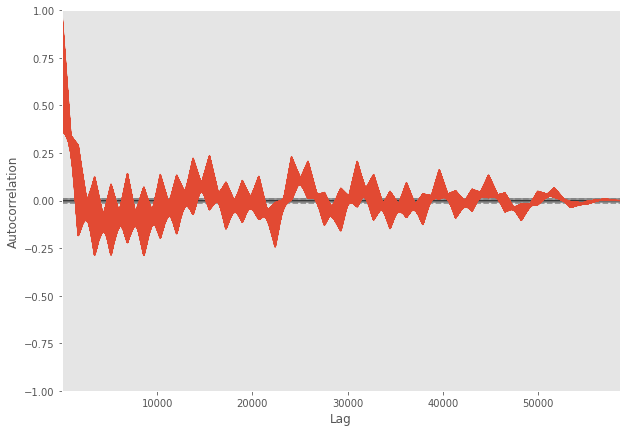

In [47]:
#Auto correlation plot

pd.plotting.autocorrelation_plot(df)
plt.show()

In [48]:
from statsmodels.tsa.ar_model import AR

In [49]:
model = AR(df)
model_fit = model.fit()

/home/user/.local/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)


/home/user/.local/lib/python3.6/site-packages/stat

In [50]:
print('The lag value chose is: %s' % model_fit.k_ar)

print('The coefficients of the model are:\n %s' % model_fit.params)

The lag value chose is: 59
The coefficients of the model are:
 const                     0.058816
L1.AverageTemperature     0.665511
L2.AverageTemperature     0.034200
L3.AverageTemperature    -0.011927
L4.AverageTemperature    -0.042269
L5.AverageTemperature    -0.008618
L6.AverageTemperature    -0.012597
L7.AverageTemperature    -0.029447
L8.AverageTemperature     0.059100
L9.AverageTemperature     0.046927
L10.AverageTemperature    0.081292
L11.AverageTemperature    0.152134
L12.AverageTemperature    0.159716
L13.AverageTemperature   -0.033184
L14.AverageTemperature   -0.075882
L15.AverageTemperature   -0.009592
L16.AverageTemperature   -0.009073
L17.AverageTemperature    0.027017
L18.AverageTemperature   -0.017520
L19.AverageTemperature   -0.012726
L20.AverageTemperature   -0.011803
L21.AverageTemperature   -0.020356
L22.AverageTemperature   -0.054042
L23.AverageTemperature    0.055684
L24.AverageTemperature    0.146100
L25.AverageTemperature   -0.084443
L26.AverageTemperature   -0

**Conclusion :-** The model choosing the 59 lag value.

In [51]:
pred = model_fit.predict()

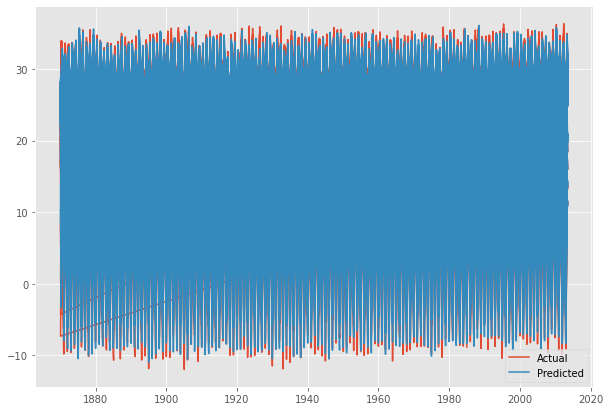

In [52]:
plt.plot(df,label="Actual")
plt.plot(pred,label="Predicted")
plt.legend()
plt.show()

**Conclusion :-** Here we can see the Actual temperatures and Predicted temperatures are almost same for all year.

In [53]:
residual=model_fit.resid

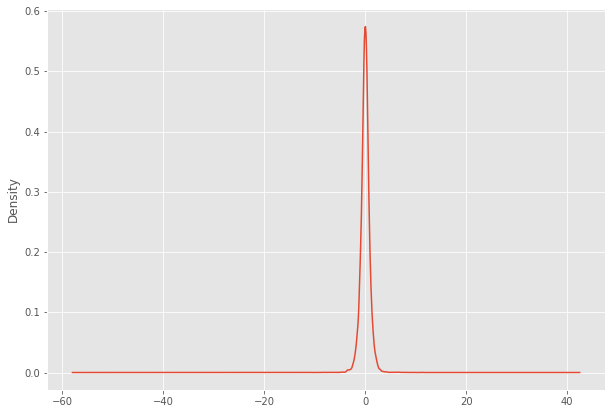

In [54]:
residual.plot(kind="kde")
plt.show()

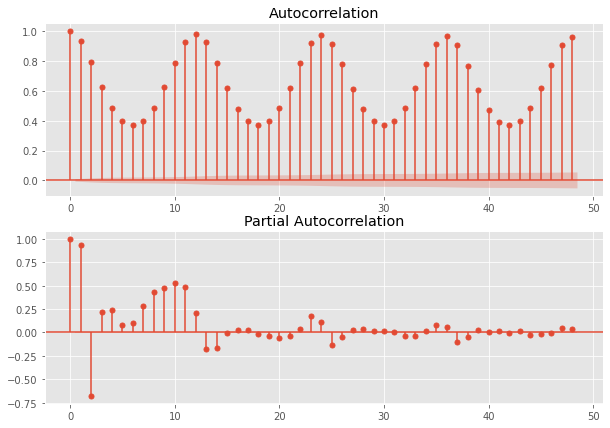

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(2)

axs[0].set_title("ACF plot")
plot_acf(df, ax = axs[0])

axs[1].set_title("PACF plot")
plot_pacf(df, ax = axs[1])

plt.show()

## ARIMA

In [56]:
from pmdarima import auto_arima

# auto_model = auto_arima(df, trace = True)

In [57]:
# auto_model.summary()

### Split data in training and testing

In [58]:
india=india.head(10000)
india=india.iloc[:,:-3]
india.head()

AverageTemperature
dt                            
1870-02-01              24.804
1870-03-01              25.724
1870-04-01              27.336
1870-05-01              27.657
1870-06-01              27.144

In [59]:
train_len=int(0.8*len(india))
train_len

8000

In [60]:
train=india[:train_len]
train

AverageTemperature
dt                            
1870-02-01              24.804
1870-03-01              25.724
1870-04-01              27.336
1870-05-01              27.657
1870-06-01              27.144
...                        ...
1962-01-01              14.456
1962-02-01              18.447
1962-03-01              23.495
1962-04-01              28.630
1962-05-01              30.511

[8000 rows x 1 columns]

In [61]:
test=india[train_len:]
test

AverageTemperature
dt                            
1962-06-01              30.304
1962-07-01              29.497
1962-08-01              28.181
1962-09-01              28.099
1962-10-01              25.020
...                        ...
1985-03-01              12.940
1985-04-01              15.625
1985-05-01              19.866
1985-06-01              20.984
1985-07-01              18.729

[2000 rows x 1 columns]

In [62]:
from statsmodels.tsa.arima_model import ARIMA 

In [ ]:
model = ARIMA(train, order =(2, 1, 5))

model_fit = model.fit()


/home/user/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/home/user/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. 

In [ ]:
y_pred_test = model_fit.predict(start = len(train), end = len(india)-1)
                        
y_pred_test

In [ ]:
test.plot(title = "Testing data")
y_pred_test.plot()
plt.legend()
plt.show()

In [ ]:
residuals = model_fit.resid
residuals.plot(kind = "kde")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
 
mse = mean_squared_error(test, y_pred_test)
 
print("MSE is :", mse)
 
print("RMSE is :", np.sqrt(mse))